# From Business Problem to Machine Learning Problem

#### Group 16:
- Carolina Cotrim - 39319
- José Sousa - 49433
- Mónica Pinto - 39349
- Tiago Mota - 50387
- Vasco Grincho - 39357

**Link to video:** https://youtu.be/6FvGRtVPoYU

## 1. Analysis of the dataset

Our team was presented with MovieLens dataset that includes ratings and tags given by users over the period of approximately 20 years, from January 9th 1995 until 31st March 2015.

In order to understand what our dataset could help solve, we needed to perform some data cleaning steps, followed by an Exploratory Analysis.

### 1.1 Data Curation

From all the files present in the database, we decided to pursue with the movies, ratings and tags CSVs after completing some data curation tasks that can be seen next.

In [2]:
import pandas as pd

In [ ]:
movies_df = pd.read_csv("../data/movies.csv")
movies_df

# Separate the year of the titles into a new column called year
movies_df["release_year"] = movies_df.title.str.extract("(\(\d\d\d\d\))",expand=False)
movies_df["release_year"] = movies_df["release_year"].str[1:-1]
movies_df["title"] = movies_df.title.str.replace("(\(\d\d\d\d\))", "")
movies_df["title"] = movies_df["title"].apply(lambda x: x.strip())

# Creating a half cleaned dataset to help on EDA
movies_df.to_csv("../data/movies_half_cleaned.csv", index = False)

# Separate the genres into each column
genres = ["Action", "Adventure", "Animation", "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western", "IMAX"]

for genre in genres:
    individual_values = []
    for row in movies_df["genres"]:
        if genre in row:
            individual_values.append(1)
        else:
            individual_values.append(0)

    movies_df[genre] = individual_values

# Select only the relevant columns
movies_df = movies_df[["movieId", "title", "release_year", "Action", "Adventure", "Animation", "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western", "IMAX"]]

# Save into a new CSV
movies_df.to_csv("../data/movies_cleaned.csv", index = False)

In [ ]:
ratings_df = pd.read_csv("../data/ratings.csv")

# Convert timestamp into actual date
ratings_df["timestamp"] = pd.to_datetime(ratings_df["timestamp"],unit='s')

# Create year, month, day, hour, minutes, seconds columns to facilitate analysis
ratings_df["year"] = ratings_df["timestamp"].dt.year
ratings_df["month"] = ratings_df["timestamp"].dt.month
ratings_df["day"] = ratings_df["timestamp"].dt.day
ratings_df["hour"] = ratings_df["timestamp"].dt.hour
ratings_df["minute"] = ratings_df["timestamp"].dt.minute
ratings_df["second"] = ratings_df["timestamp"].dt.second

# Save into a new CSV
ratings_df.to_csv("../data/ratings_cleaned.csv", index = False)

#### 1.1.1 Recap on Data Curation

On Movies we:
- Separated the years from the titles of the movies
- Transformed the genres into columns with a binary feature (if the movie had Adventure has an genre then the number 1 appears, if not, the number 0 appears)

On Ratings we:
- Transformed the timestamp column into datetime
- Separated the new timestamp into year, month, day, hour, minute, second

After all this, we concluded that with this data, we would most likely be able to complete our project.

### 1.2 Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
movies = pd.read_csv("../data/movies_cleaned.csv")
movies_2 = pd.read_csv("../data/movies_half_cleaned.csv")
ratings = pd.read_csv("../data/ratings.csv")

#### 1.2.1 Number of movies throughout the decades

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

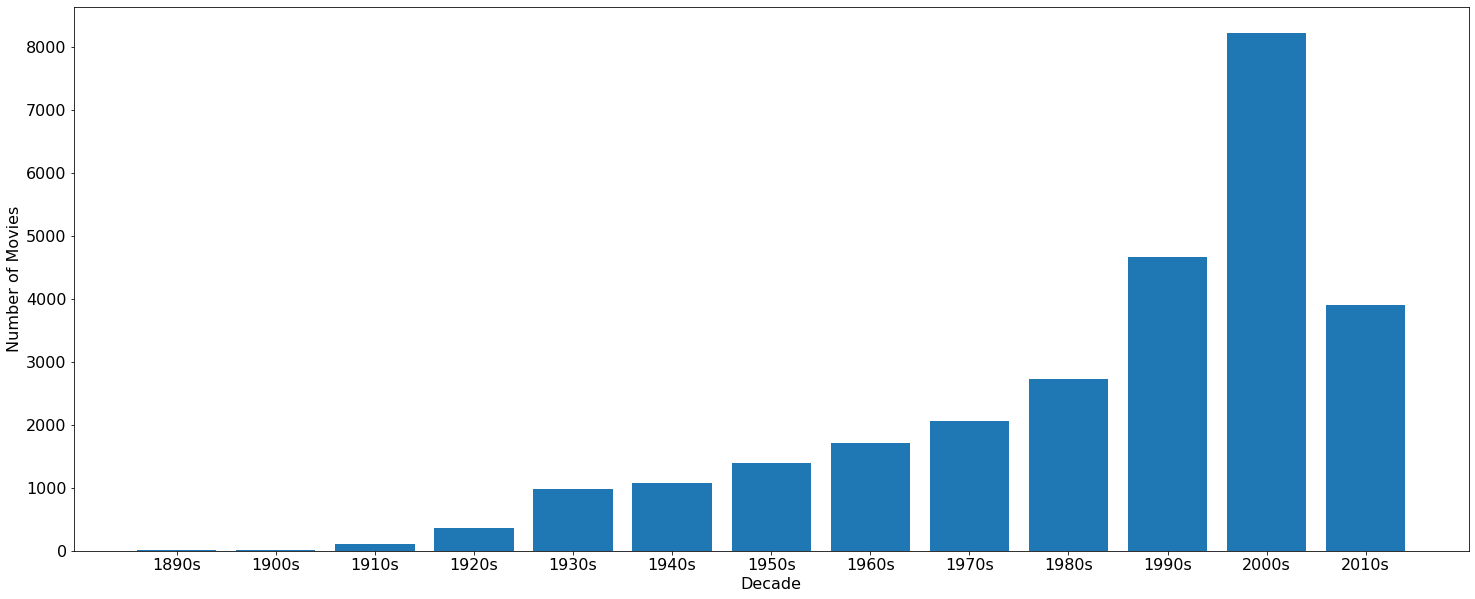

In [ ]:
movies['decades'] = pd.cut(movies['release_year'], [1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], labels =['1890s', '1900s', '1910s','1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s', '2010s'])

n_movies_decade = movies.groupby('decades').count()['movieId']
fig, ax = plt.subplots(figsize=(25,10))
plt.bar(n_movies_decade.index, n_movies_decade)
plt.xlabel('Decade', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

**Conclusions:** We can clearly observe an increasing trend in the number of movies throughout the years, especially after 2000 when technological advances also experienced a break-through.

#### 1.2.2 Number of movies throughout the decades stacked by genres

In [1]:
decades = ['1890s', '1900s', '1910s','1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s', '2010s']

genres = ["Action", "Adventure", "Animation", "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western", "IMAX"]

movies['decades'] = pd.cut(movies['release_year'], [1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], labels = decades)

n_decade = pd.DataFrame()
n_decade["decades"] = decades

for genre in genres:
    values = []
    for decade in decades:
        movies_df_decade = movies[movies["decades"] == decade]
        the_genre =  movies_df_decade[movies_df_decade[genre] == 1]
        n_movies_genre = len(the_genre)
        values.append(n_movies_genre)

    n_decade[genre] = values

n_decade["total"] = n_decade[genres].sum(axis = 1)

for genre in genres:
    n_decade[genre] = n_decade[genre] / n_decade["total"]

ax = n_decade[["decades"] + genres].plot(x = "decades", kind = "bar", stacked = True, rot = 0, xlabel = "Decade", ylabel = "Share", figsize = (25, 15))

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    value = int(height * 100)
    if value < 5:
        value = ''
    label_text = f"{value}{'%' if value != '' else ''}"
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, 1), title='Genre')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

NameError: name 'pd' is not defined

**Conclusions:**
In this case we can see the previous graph stacked into genres as percentages to better understand how their share evolved over time. The percentages only appear if they are higher or equal to 5%.

Some interesting conclusions can be taken:
- In the 1890s, there were only 6 genres
- The biggest share from 1900s onwards is into movies of Drama
- IMAX started to emerge in the 1980s decade
- Sci-Fi was a high share in the 1900s but it started to decrease over the decades (with the exception of 1980s).

#### 1.2.3 Number of reviews per rating class

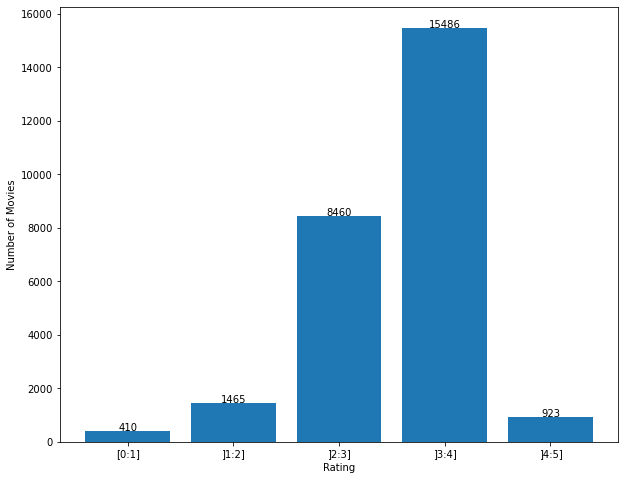

In [ ]:
mean_rating_df = ratings[['movieId', 'rating']].groupby('movieId').mean()

mean_rating_df['ratings_class'] = pd.cut(mean_rating_df['rating'], [0, 1, 2, 3, 4, 5], \
                                  labels =['[0:1]', ']1:2]', ']2:3]', ']3:4]', ']4:5]'])

n_ratings = mean_rating_df.groupby('ratings_class').count()['rating']
fig, ax = plt.subplots(figsize=(10,8))
ax.ticklabel_format(style='plain')

plt.bar(n_ratings.index, n_ratings)
plt.xlabel('Rating')
plt.ylabel('Number of Movies')

for i in range(len(n_ratings.index)):
        plt.text(i, n_ratings[i], n_ratings[i], ha = 'center')

**Conclusions:** The most frequent rate viewers give to movies is, on average, between 3 and 4.

#### 1.2.4 Number of reviews per rating class stacked by genres

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

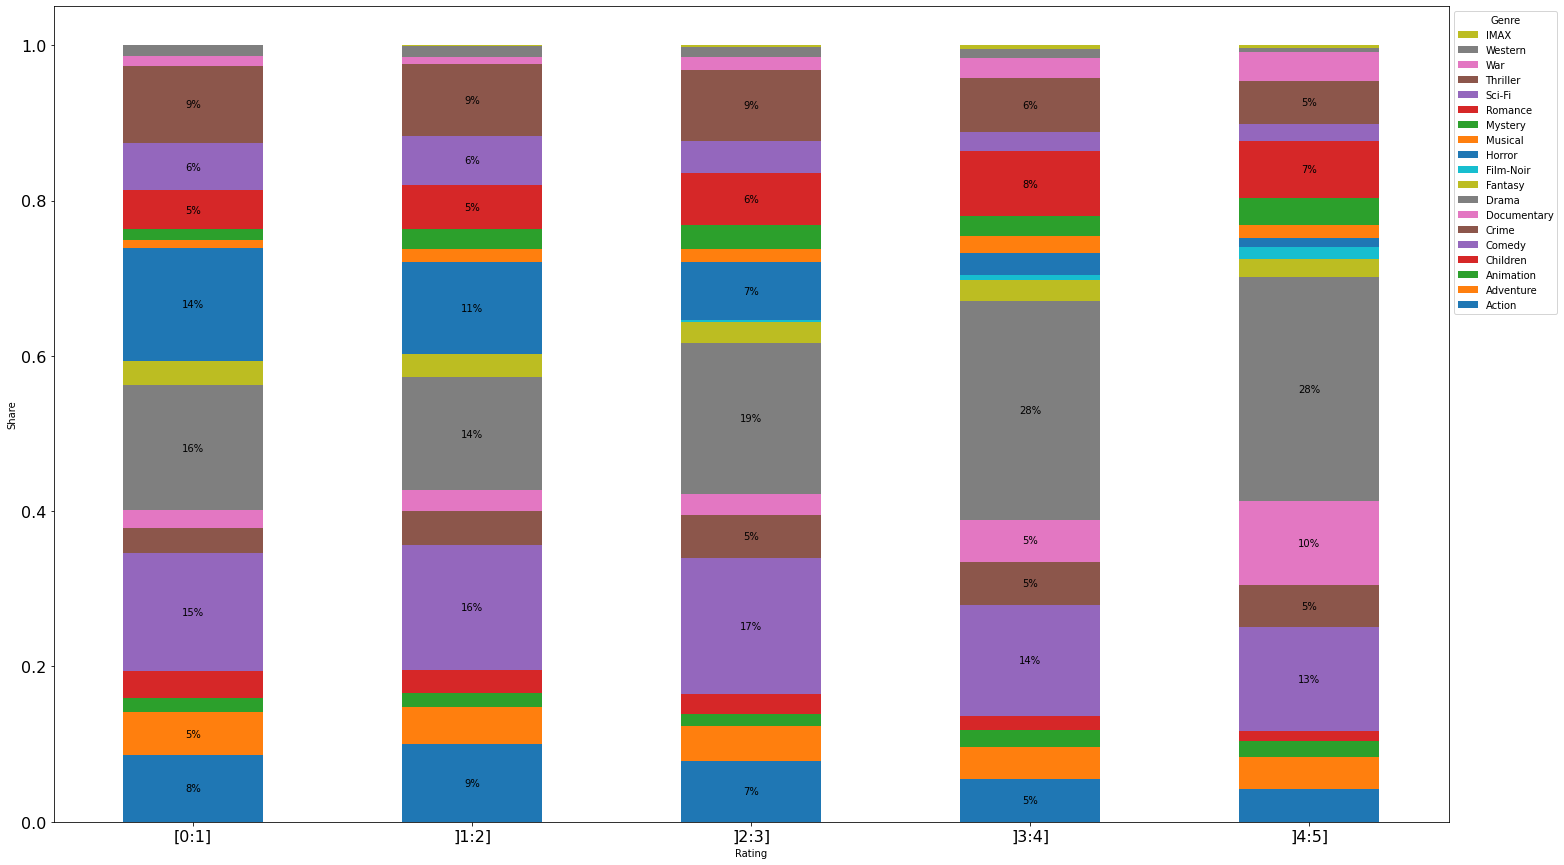

In [ ]:
mean_rating_df = ratings[['movieId', 'rating']].groupby('movieId').mean()
df = mean_rating_df.merge(movies, on = "movieId", how = "right")

classes = ['[0:1]', ']1:2]', ']2:3]', ']3:4]', ']4:5]']

genres = ["Action", "Adventure", "Animation", "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western", "IMAX"]

df['ratings_class'] = pd.cut(df['rating'], [0, 1, 2, 3, 4, 5], labels = classes)

n_classes = pd.DataFrame()
n_classes["ratings_class"] = classes

for genre in genres:
    values = []
    for r_class in classes:
        ratings_df_classes = df[df["ratings_class"] == r_class]
        the_genre =  ratings_df_classes[ratings_df_classes[genre] == 1]
        ratings_genre = len(the_genre)
        values.append(ratings_genre)

    n_classes[genre] = values

n_classes["total"] = n_classes[genres].sum(axis = 1)

for genre in genres:
    n_classes[genre] = n_classes[genre] / n_classes["total"]

ax = n_classes[["ratings_class"] + genres].plot(x = "ratings_class", kind = "bar", stacked = True, rot = 0, xlabel = "Rating", ylabel = "Share", figsize = (25, 15))

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    value = int(height * 100)
    if value < 5:
        value = ''
    label_text = f"{value}{'%' if value != '' else ''}"
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, 1), title='Genre')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

**Conclusions:**
In this case we can see the previous graph stacked into genres as percentages to better understand how their share evolved over time. The percentages only appear if they are higher or equal to 5%.

Some interesting conclusions can be taken:
- Drama has the highest percentage of movies with over 4 stars (but also has the highest number of movies so this result was expected)
- Horror movies do not account for a high percentage beyond 4 stars. However, it accounts for 14% of movies with ratings below or equal to 1, so, we can conclude here that Horror movies are normally not very well classified


#### 1.2.5 Number of reviews per 5 year period

Text(0, 0.5, 'Number of Reviews')

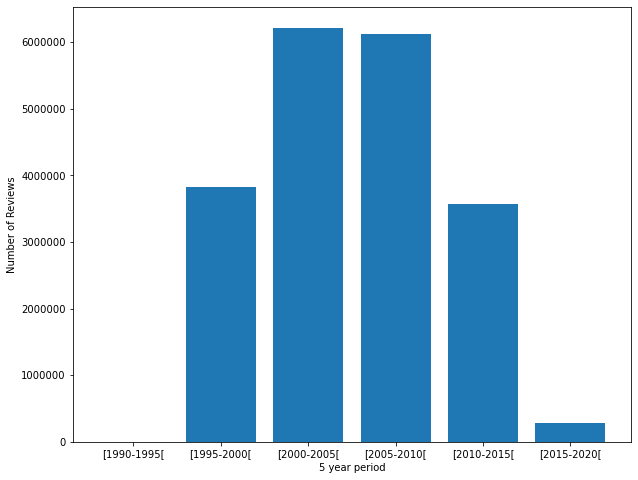

In [ ]:
ratings['decade'] = pd.cut(ratings['year'], [1990, 1995, 2000, 2005, 2010, 2015, 2020], right = False, \
                                  labels =['[1990-1995[','[1995-2000[', '[2000-2005[', '[2005-2010[', '[2010-2015[', '[2015-2020['])

n_reviews_decade = ratings.groupby('decade').count()['movieId']

fig, ax = plt.subplots(figsize=(10,8))
ax.ticklabel_format(style='plain')

plt.bar(n_reviews_decade.index, n_reviews_decade)
plt.xlabel('5 year period')
plt.ylabel('Number of Reviews')

**Conclusions:** The number of reviews increased from 1995 until 2010. After that year, the number of reviews started to decrease.

#### 1.2.6 Number of reviews per 5 year period stacked by genres

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

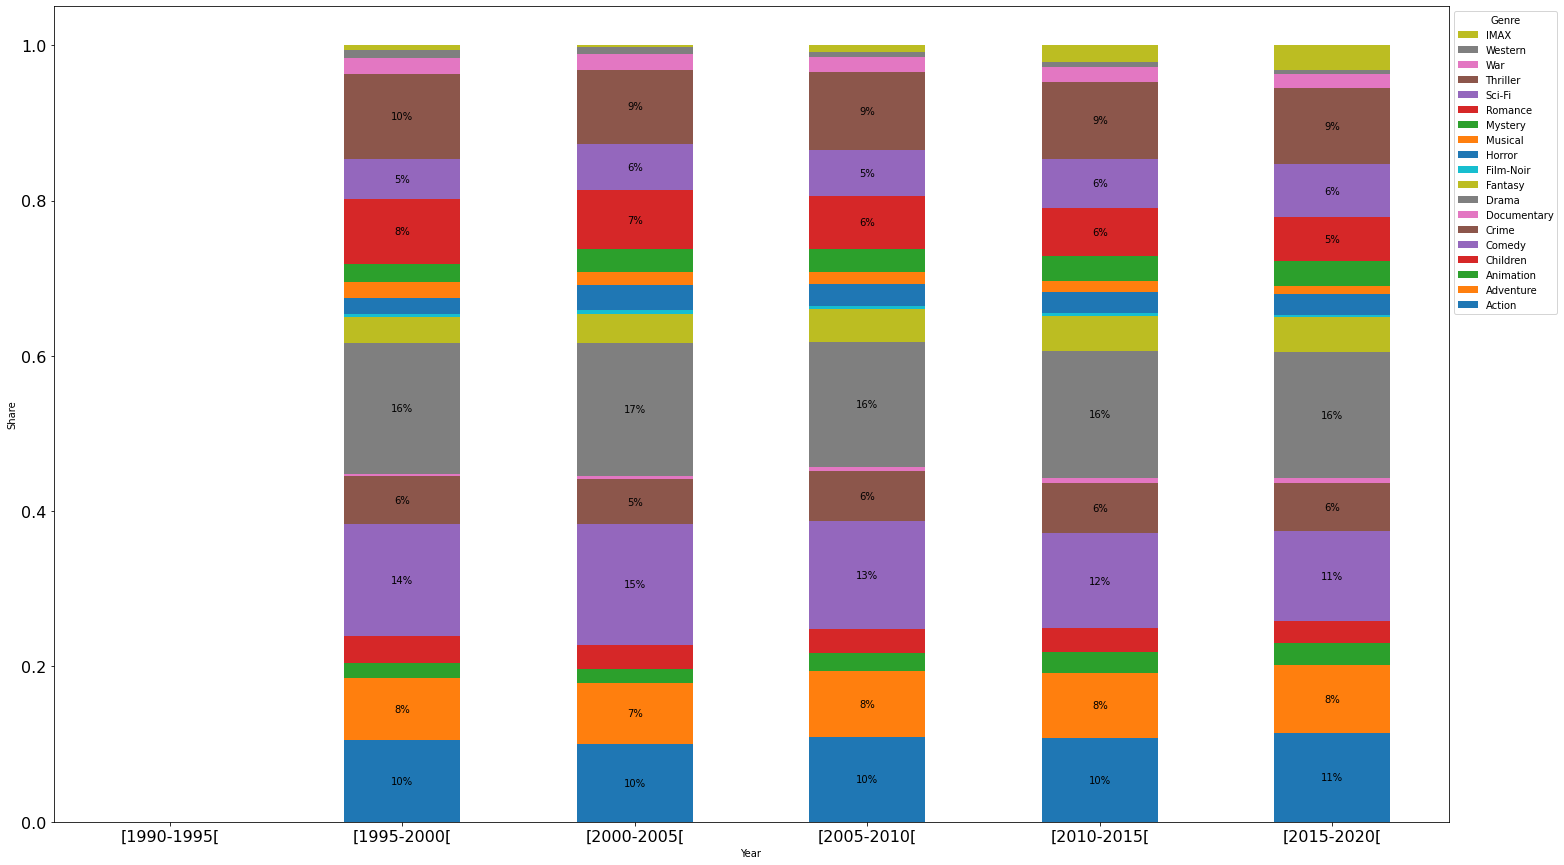

In [ ]:
divisions = ['[1990-1995[','[1995-2000[', '[2000-2005[', '[2005-2010[', '[2010-2015[', '[2015-2020[']
ratings['division'] = pd.cut(ratings['year'], [1990, 1995, 2000, 2005, 2010, 2015, 2020], right = False, labels = divisions)

df2 = ratings.merge(movies, on = "movieId", how = "right")

genres = ["Action", "Adventure", "Animation", "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western", "IMAX"]

n_division = pd.DataFrame()
n_division["division"] = divisions

for genre in genres:
    values = []
    for division in divisions:
        ratings_division = df2[df2["division"] == division]
        the_genre =  ratings_division[ratings_division[genre] == 1]
        n_movies_genre = len(the_genre)
        values.append(n_movies_genre)

    n_division[genre] = values

n_division["total"] = n_division[genres].sum(axis = 1)

for genre in genres:
    n_division[genre] = n_division[genre] / n_division["total"]

ax = n_division[["division"] + genres].plot(x = "division", kind = "bar", stacked = True, rot = 0, xlabel = "Year", ylabel = "Share", figsize = (25, 15))

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    value = int(height * 100)
    if value < 5:
        value = ''
    label_text = f"{value}{'%' if value != '' else ''}"
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, 1), title='Genre')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

**Conclusions:**
In this case we can see the previous graph stacked into genres as percentages to better understand how their share evolved over time. The percentages only appear if they are higher or equal to 5%.

Some interesting conclusions can be taken:
- The number of reviews did not change drastically over the 5-year periods
- Reviews on Drama movies tend to be around 16%
- Reviews on Comedy movies tend to be around 14%


### 1.2.7 Top 10 Movies with highest number of reviews

In [ ]:
#Obtain average rating and number of reviews per movie
mean_rating_df = ratings[['movieId', 'rating']].groupby('movieId').mean()
count_rating_df = ratings[['movieId', 'rating']].groupby('movieId').count()

mean_rating_df.rename(columns={'rating':'average_rating'},inplace = True)
count_rating_df.rename(columns={'rating':'number_reviews'},inplace = True)

#Merge Data sets
movie_rating_df = mean_rating_df.merge(movies_2, on = "movieId", how = "right")
movie_rating_df = count_rating_df.merge(movie_rating_df, on = "movieId", how = "right")

top_number_reviews = movie_rating_df.sort_values(by='number_reviews',ascending = False).head(10)
top_number_reviews[["title", "number_reviews", "genres", "release_year"]]

title  number_reviews  \
293                         Pulp Fiction         67310.0   
352                         Forrest Gump         66172.0   
315            Shawshank Redemption, The         63366.0   
587            Silence of the Lambs, The         63299.0   
476                        Jurassic Park         59715.0   
257   Star Wars: Episode IV - A New Hope         54502.0   
108                           Braveheart         53769.0   
583           Terminator 2: Judgment Day         52244.0   
2486                         Matrix, The         51334.0   
523                     Schindler's List         50054.0   

                                genres  release_year  
293        Comedy|Crime|Drama|Thriller        1994.0  
352           Comedy|Drama|Romance|War        1994.0  
315                        Crime|Drama        1994.0  
587              Crime|Horror|Thriller        1991.0  
476   Action|Adventure|Sci-Fi|Thriller        1993.0  
257            Action|Adventure|Sci-Fi        1977.0  
108                   Action|Drama|War        1995.0  
583                      Action|Sci-Fi        1991.0  
2486            Action|Sci-Fi|Thriller        1999.0  
523                          Drama|War        1993.0

#### 1.2.8 Top 10 Movies with highest ratings

In [ ]:
#Obtain average rating and number of reviews per movie
mean_rating_df = ratings[['movieId', 'rating']].groupby('movieId').mean()
count_rating_df = ratings[['movieId', 'rating']].groupby('movieId').count()

mean_rating_df.rename(columns={'rating':'average_rating'},inplace = True)
count_rating_df.rename(columns={'rating':'number_reviews'},inplace = True)

#Merge Data sets
movie_rating_df = mean_rating_df.merge(movies_2, on = "movieId", how = "right")
movie_rating_df = count_rating_df.merge(movie_rating_df, on = "movieId", how = "right")

movie_rating_df
df = movie_rating_df[(movie_rating_df['number_reviews']>100)]
top_rating = df.sort_values(by='average_rating',ascending = False).head(10)
top_rating[["title", "average_rating", "genres", "release_year"]]

title  average_rating  \
315                Shawshank Redemption, The        4.446990   
843                           Godfather, The        4.364732   
49                       Usual Suspects, The        4.334372   
523                         Schindler's List        4.310175   
1195                 Godfather: Part II, The        4.275641   
1935    Seven Samurai (Shichinin no samurai)        4.274180   
887                              Rear Window        4.271334   
7356                        Band of Brothers        4.263182   
895                               Casablanca        4.258327   
905   Sunset Blvd. (a.k.a. Sunset Boulevard)        4.256935   

                       genres  release_year  
315               Crime|Drama        1994.0  
843               Crime|Drama        1972.0  
49     Crime|Mystery|Thriller        1995.0  
523                 Drama|War        1993.0  
1195              Crime|Drama        1974.0  
1935   Action|Adventure|Drama        1954.0  
887          Mystery|Thriller        1954.0  
7356         Action|Drama|War        2001.0  
895             Drama|Romance        1942.0  
905   Drama|Film-Noir|Romance        1950.0

**Conclusions:**
Regarding the movies importance, we assume that two good possible measures are the number of reviews attributed per movie and their average ratings.

By observing the number of reviews per each independent movie, we can conclude that, among the top 10 the majority of movies are from either Action or Drama. This may imply that these categories tend to catch more attention from the public. Another curiosity would be to see that 9 out of the top 10 are from the decade 1990-2000.

On the other hand, the top 10 of average rating shows different conclusions. To compute this, we only considered the movies with a considered amount of votes, say 100, since it may better represent the general public opinion. The average rating of a movie with few votes does not represent the voting population, so it does not represent the movies' quality and relevance.

By assessing the values, similarly to the previous table, it appears that there is a tendency towards Drama movies but only one movie contains the Action genre. In this top 10 there seems to be no pattern in terms of release year.


## 2. Formulation of the Business Problem

With this analysis we understood how many options a user has and how hard it is to actually chose a movie to watch next. If one is giving reviews on movies one has watched or even just watching them, then there must be a way for movie streaming applications to improve the user experience using the information on this dataset.

With this Business Problem in mind, we thought about two ways to improve the user experience:
- The first is by predicting the similarity between movies and, based on this, show, on the streaming platform, a Top 10 movies to watch next
- And the second is by predicting the ratings that the user would give to movies he has not seen yet and, based on this, show, on the streaming platform, a Top 10 movies to watch next

The value 10 was chosen to give the user sufficient offer to choose from but not feel overwhelmed with the amount presented. If we gave 20 or 30, for instance, the movies would become less and less relevant and so less interesting for the user.

**Problem Formulation:** Given previous movies watched or ratings given, predict Top 10 Movies to Watch Next.


## 3. Model Testing

To make this a reality, we made use of different recommendation systems methods using well known machine learning models.

The idea behind the model that approaches our first proposal (predicting similarity) is that the streaming platform would input the movie id or title of the last movie the users has watched, and it would display the top 10 movies automatically without needing any employee action.

For the second proposal, is the same, but the platform would input the user id.

Since there are several models that answer our business problem, we chose 3 to answer our first approach and one to answer our second approach. We then compared them and, in the end, we selected the most accurate and relevant one.

### 3.1 Tackling First Approach (3 models) - Uses "Movie Id" or "Movie Title" as input

#### 3.1.1 Basic Correlation Matrix Model

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [7]:
movies_df = pd.read_csv("/data/movies.csv")
movies_df['genres'] = movies_df['genres'].str.replace('|',' ')
ratings = pd.read_csv("/data/ratings_cleaned.csv")
movies_df.fillna("", inplace=True)

mixed = pd.DataFrame(movies_df.groupby('movieId')['genres'].apply(lambda x: "%s" % ' '.join(x)))

Final = pd.merge(movies_df, mixed, on='movieId', how='left')

Final ['metadata'] = Final[[ 'genres_x']].apply(lambda x: ' '.join(x), axis = 1)

Final[['movieId','title','metadata']].head(3)

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Final['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=Final.index.tolist())

# Compress with SVD
svd = TruncatedSVD(n_components=22)
latent_matrix = svd.fit_transform(tfidf_df)

# Final latent matrix
n = 50
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=Final.title.tolist())

ratings_df = ratings.drop(columns=['timestamp', 'year', 'month', 'day', 'hour', 'minute', 'second'])

movie_title = movies_df[["movieId","title"]]
movie_ratings = pd.merge(movie_title,ratings_df, on = "movieId")
movie_ratings = pd.merge(movie_title,ratings_df, on = "movieId")
mean_ratings = pd.DataFrame(movie_ratings.groupby("title")["rating"].mean())
mean_ratings["num of ratings"] = pd.DataFrame(movie_ratings.groupby("title")["rating"].count())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [8]:
def first_model(movie):
  #creating the matrix
  matrix = movie_ratings.pivot_table(index = "userId",columns = "title",values = "rating")

  # harvesting users ratings from the matrix
  ratings_for_movie = matrix[movie]
  #creating the correlation variable
  similar_to_movie = matrix.corrwith(ratings_for_movie)

  # correlation dataframe (DataFrame with all the correlation values for a certain movie)
  corr_with_movie = pd.DataFrame(similar_to_movie,columns=["Corr"])
  corr_with_movie.dropna(inplace = True)
  # sorting the correlation values to present only the top 20 results with the highest correlation
  corr_with_movie.sort_values("Corr",ascending = False)
  corr_with_movie = corr_with_movie.join(mean_ratings["num of ratings"])
  final_corr =  corr_with_movie[corr_with_movie["num of ratings"] > 150].sort_values("Corr",ascending = False).head(10)
  return final_corr

In [ ]:
#Here we check the 10 highest correlated movies with Toy Story
first_model("Toy Story (1995)")

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Corr  num of ratings
title                                            
Toy Story (1995)         1.000000            6572
Toy Story 2 (1999)       0.754127            2988
Toy Story 3 (2010)       0.559435             772
Monsters, Inc. (2001)    0.541185            3129
Bug's Life, A (1998)     0.536925            2699
Finding Nemo (2003)      0.525204            3136
Cars (2006)              0.474373             633
Open Range (2003)        0.456228             160
Incredibles, The (2004)  0.438688            2648
Lion King, The (1994)    0.430454            5146

##### 3.1.1.1 Conclusions

This is the first model we created, so, as expected, it does not have a high degree of complexity.

It is a recommender that uses pierce correlation to suggest the  10 most correlated movies to the movie the user just watched - this correlation is based on user’s ratings.

Here we are assuming that the last movie watched was Toy Story, so we use users that gave a similar rating to Toy Story, in this case, as our correlating data.

The output can be read as: users that rated Toy Story with a similar rating to you, also watched these movies and rated them highly.

The main disadvantage of this model is the fact that the user needs to have given a rating to the last movie so that the streaming platform can give the Top 10 Movies to Watch Next.


#### 3.1.2 Hybrid Correlation Matrix Model

In [9]:
tags = pd.read_csv("/data/tags.csv")

#limit ratings to user ratings that have rated more that 55 movies --
#Otherwise it becomes impossible to pivot the rating dataframe later for collaborative filtering.
ratings_f = ratings.groupby('userId').filter(lambda x: len(x) >= 55)

# list the movie titles that survive the filtering
movie_list_rating = ratings_f.movieId.unique().tolist()

#filter the movies data frame
movies_df = movies_df[movies_df.movieId.isin(movie_list_rating)]

# map movie to id:
Mapping_file = dict(zip(movies_df.title.tolist(), movies_df.movieId.tolist()))

# create a mixed dataframe of movies title, genres
# and all user tags given to each movie
mixed = pd.merge(movies_df, tags, on='movieId', how='left')

# create metadata from tags and genres
mixed.fillna("", inplace=True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(lambda x: "%s" % ' '.join(x)))
Final = pd.merge(movies_df, mixed, on='movieId', how='left')
Final ['metadata'] = Final[['tag', 'genres']].apply(lambda x: ' '.join(x), axis = 1)
Final[['movieId','title','metadata']].head(3)

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Final['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=Final.index.tolist())


# Compress with SVD
svd = TruncatedSVD(n_components=200)
latent_matrix = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()

#number of latent dimensions to keep
n = 200
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=Final.title.tolist())
# our content latent matrix:

ratings_f1 = pd.merge(movies_df[['movieId']], ratings_f, on="movieId", how="right")
ratings_f2 = ratings_f1.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)

svd = TruncatedSVD(n_components=150)
latent_matrix_2 = svd.fit_transform(ratings_f2)
latent_matrix_2_df = pd.DataFrame(latent_matrix_2,index=Final.title.tolist())

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
def model(movie):
# take the latent vectors for a selected movie from both content 
# and collaborative matrixes
  a_1 = np.array(latent_matrix_1_df.loc[movie]).reshape(1, -1)
  a_2 = np.array(latent_matrix_2_df.loc[movie]).reshape(1, -1)

# calculate the similartity of this movie with the others in the list
  score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
  score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# an average measure of both content and collaborative 
  hybrid = ((score_1 + score_2)/2.0)

# form a data frame of similar movies 
  dictDf = {'content': score_1 , 'ratings': score_2, 'hybrid': hybrid} 
  similar = pd.DataFrame(dictDf, index = latent_matrix_1_df.index )

#sort it on the basis of either: content, collaborative or hybrid, 
# here : content
  similar.sort_values('hybrid', ascending=False, inplace=True)


  return similar[movie:].head(10)




In [10]:
model("Jumanji (1995)")

content   ratings    hybrid
Jumanji (1995)                1.000000  1.000000  1.000000
Mrs. Doubtfire (1993)         0.727314  0.480812  0.604063
Toys (1992)                   0.725553  0.467999  0.596776
Flubber (1997)                0.709654  0.447951  0.578803
Hook (1991)                   0.584303  0.470468  0.527385
Good Morning, Vietnam (1987)  0.563755  0.487456  0.525606
Jack (1996)                   0.705167  0.331286  0.518226
One Hour Photo (2002)         0.666287  0.339051  0.502669
Moscow on the Hudson (1984)   0.698456  0.281860  0.490158
Aladdin (1992)                0.525446  0.426680  0.476063

##### 3.1.2.1 Conclusions

This model is more complex, it uses cosine similarity.  More specificaly, it uses users’ ratings, movie genres and tags, to find the Top 10 most similar movies to the one the user inputted. The result is an average between these two inputs that we called Hybrid.

This value considers similarity in ratings and in genres, making it a more complex and accurate recommendation than the previous model.

In this case, the user does not need to have given a rating to the movie since the model can easily use both tags and genres to output the Top 10 Movies to Watch Next.


#### 3.1.3 LightFM

In [ ]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score
from scipy import sparse
from lightfm.cross_validation import random_train_test_split
from sklearn.metrics.pairwise import cosine_similarity

C:\Users\cotri\anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


##### 3.1.3.1 Data Preparation and setting test and train set

In [ ]:
ratings = ratings[['movieId', 'userId', 'rating']]
ratings = ratings.groupby("movieId").filter(lambda x: len(x) >= 800)

In [ ]:
moviematrix = ratings.pivot_table(index="userId",columns="movieId",values='rating').fillna(0)
matrix_sparse = sparse.csr_matrix(moviematrix)

In [ ]:
train, test = random_train_test_split(matrix_sparse, test_percentage=0.5)

#####  3.1.3.2 Training the lightFM model

In [ ]:
model = LightFM(no_components=30, loss='warp', k=15)
mtx_fact = model.fit(train, epochs=30, num_threads=4)

In [ ]:
user_id = list(moviematrix.index)
user_dict = {}
n = 0
for i in user_id:
    user_dict[i] = n
    n += 1

movies_dict = {}
for i in range(movies.shape[0]):
    movies_dict[(movies.loc[i, 'movieId'])] = movies.loc[i, 'title']

##### 3.1.3.3 Building the Recommender System

In [ ]:
def lightfm_recommender (movie_id, n_movies):
    df_item_norm_sparse = sparse.csr_matrix(mtx_fact.item_embeddings)
    similarities = cosine_similarity(df_item_norm_sparse)
    item_emdedding_distance_matrix = pd.DataFrame(similarities)
    item_emdedding_distance_matrix.columns = moviematrix.columns
    item_emdedding_distance_matrix.index = moviematrix.columns

    recommended_items = list(pd.Series(item_emdedding_distance_matrix.loc[movie_id,:]. \
                                      sort_values(ascending = False).head(n_movies+1). \
                                      index[1:n_movies+1]))


    print("\nTop", n_movies, "Movie recommendations for users who saw", movies_dict[movie_id], "are:")
    ranking = list(range(1, 11))
    similar_movies = []

    for i in recommended_items:
      movie = movies_dict[i]
      similar_movies.append(movie)

    data = {'Ranking':ranking, 'Movie':similar_movies}
    recommended_movies = pd.DataFrame(data).set_index('Ranking')
    return recommended_movies

In [ ]:
movie_id = int(input("Enter movie id: "))
n_movies = int(input("Enter number of movies to be recommended: "))
lightfm_recommender(movie_id, n_movies)


Top 10 Movie recommendations for users who saw Toy Story are:


Movie
Ranking                                                 
1                              James and the Giant Peach
2                                 Muppet Treasure Island
3               Grand Day Out with Wallace and Gromit, A
4                    Willy Wonka & the Chocolate Factory
5                                     Mr. Holland's Opus
6                                                Aladdin
7                                            Toy Story 2
8                        Wallace & Gromit: A Close Shave
9            Austin Powers: International Man of Mystery
10       Wallace & Gromit: The Best of Aardman Animation

##### 3.1.3.4 Evaluation of the model

In [ ]:
train_precision = precision_at_k(model, train, k=10).mean()
test_precision = precision_at_k(model, test, k=10).mean()

print('The precision in the train is:', train_precision)
print('The precision in the test is:', test_precision)

The precision in the train is: 0.40287596
The precision in the test is: 0.26293793


In [ ]:
train_auc = auc_score(model, train).mean()
test_auc = auc_score(model, test).mean()

print('The AUC score in the train is:', train_auc)
print('The AUC score in the test is:', test_auc)

The AUC score in the train is: 0.95691514
The AUC score in the test is: 0.9180621


##### 3.1.3.5 Conclusions

This model was built using the LightFM together with cosine distance matrix using item embeddings generated by matrix factorization - the items in our case are the different movies in the dataset.

LightFM calculates similarity between movies, and then provides a recommendation of the Top 10 similar movies to a movie of interest. That is, this model is useful to recommend movies to a user based on the movies they already watched.

For instance, if the last movie a user saw was Toy Story, this model could be used to show the user the top 10 recommended movies to watch next, as presented above.

The model presents high rates of AUC scores and not so high values of precision scores. Meaning that, this model is better at measuring the quality of the overall ranking than it is at measuring the proportion of positive items among the N highest-ranked items.

So even though it is still a viable option to use, it might not be the most appropriate model when the objective is to suggest the Top 10 movies to a user.


### 3.2 Tackling Second Approach (1 model) - Uses "User Id" as input

#### 3.2.1 Deep Neural Networks Model

In [ ]:
# Importing the necessary packages for this Model
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import mean_squared_error
import math

##### 3.2.1.1 Data Preparation

In [ ]:
movies = pd.read_csv(r"C:\Users\cotri\PycharmProjects\machine-learning-group-16\data\movies_cleaned.csv")
ratings = pd.read_csv(r"C:\Users\cotri\PycharmProjects\machine-learning-group-16\data\ratings_cleaned.csv")

In [ ]:
# Merging the movies and ratings dataset
merged = pd.merge(movies, ratings, how = "inner", on = "movieId")

In [ ]:
# Getting an average review for each movie
df = merged.groupby(by=["userId", "title"], as_index = False).agg({"rating": "mean"})
df["rating"] = df["rating"].values.astype(np.float32)

In [ ]:
# Creating a new column that will be helpful for the model
df["user"] = df["userId"]-1

# Getting the unique number of users we have
n_users = df['user'].nunique()

# Creating a new column that will be helpful for the model
# It's the same as above but with the titles
final = df.sort_values("title", ascending = True)
final = final.drop_duplicates(subset=["title"])
final["movie"] = range(0, len(final))
final = final[["title", "movie"]]
df = pd.merge(df, final, on = ["title"])
n_movies = df["movie"].nunique()

In [ ]:
# Sorting the values so that the dataframe is better organized
df = df.sort_values(by="userId")
df

userId                                title  rating    user  movie
0              1                2001: A Space Odyssey     3.5       0    163
836909         1  Highlander: Endgame (Highlander IV)     4.0       0  10354
313916         1                  Conan the Destroyer     3.0       0   4998
582083         1                        Exorcist, The     3.5       0   7510
313526         1               Company of Wolves, The     4.0       0   4979
...          ...                                  ...     ...     ...    ...
17916068  138493                            Manderlay     4.5  138492  14361
9204059   138493                  Lost in Translation     5.0  138492  13752
2008147   138493                         Spider-Man 2     4.0  138492  20857
9346162   138493                    National Treasure     3.0  138492  15845
2599020   138493                      American Beauty     5.0  138492   1079

[19928293 rows x 5 columns]

##### 3.2.1.2 Preparing the data

In [ ]:
# Our independent variables will be "user" and "movie" that were defined previously
X = df[["user", "movie"]].values

# Our dependent variable will be "rating"
y = df["rating"].values

# Splitting the dataset into a training and test set, the training will constitute 80% of the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# The number of factors will be used whilst building the Neural Network
n_factors = 150

# Constructing the arrays with the values from above
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [ ]:
# Normalizing the labels
y_train = (y_train - min(df['rating']))/(max(df['rating']) - min(df['rating']))
y_test = (y_test - min(df['rating']))/(max(df['rating']) - min(df['rating']))

##### 3.2.1.3 Building Softmax Deep Neural Network

In [ ]:
# Initializing an input layer for users
user = tf.keras.layers.Input(shape = (1,))

# Embedding layer using the total number of unique users as inputs
u = keras.layers.embeddings.Embedding(n_users, n_factors, embeddings_initializer = "he_normal", embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(user)
u = tf.keras.layers.Reshape((n_factors,))(u)

In [ ]:
# Initializing an input layer for movies
movie = tf.keras.layers.Input(shape = (1,))

# Embedding layer using the total number of unique movies as inputs
m = keras.layers.embeddings.Embedding(n_movies, n_factors, embeddings_initializer = "he_normal", embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(movie)
m = tf.keras.layers.Reshape((n_factors,))(m)

In [ ]:
# Stacking up both user and movie embeddings
x = tf.keras.layers.Concatenate()([u,m])
#x = tf.keras.layers.Dropout(0.05)(x)

In [ ]:
# Adding the first Dense hidden layer with 32 neurons
x = tf.keras.layers.Dense(32, kernel_initializer = "he_normal")(x)
x = tf.keras.layers.Activation(activation = "relu")(x)
#x = tf.keras.layers.Dropout(0.05)(x)

# Adding a second Dense hidden layer with 16 neuros
x = tf.keras.layers.Dense(16, kernel_initializer = "he_normal")(x)
x = tf.keras.layers.Activation(activation = "relu")(x)
#x = tf.keras.layers.Dropout(0.05)(x)

In [ ]:
# Adding an Output layer with softmax activation function (output between 0 and 1) with 10 neurons (one per class - 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5)
x = tf.keras.layers.Dense(10)(x)
x = tf.keras.layers.Activation(activation = "softmax")(x)

In [ ]:
# Defining the model using the unique number of movies of user and movie as input
model = tf.keras.models.Model(inputs = [user, movie], outputs = x)

In [ ]:
# Compiling the model
model.compile(optimizer = "sgd", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

**Justification:**
- *Optimizer* - Sgd means Stochastic Gradient Descent - This is a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data)
- *Loss* - Sparse categorical crossentropy - We are using sparse
- *Metrics* - It's useful to know the accuracy during training and evaluation

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 150)       20773950    ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 150)       3857700     ['input_2[0][0]']                
                                                                                              

##### 3.2.1.4 Fitting and evaluation of the model

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=3, min_lr=0.000001, verbose=1)

history = model.fit(x = X_train_array, y = y_train, batch_size=25000, epochs=100, verbose=1, validation_data=(X_test_array, y_test),shuffle=True,callbacks=[reduce_lr])

638/638 [==============================] - 180s 282ms/step - loss: 0.3749 - accuracy: 0.0145 - val_loss: 0.3745 - val_accuracy: 0.0145 - lr: 0.0100
Epoch 66/100
638/638 [==============================] - 178s 280ms/step - loss: 0.3745 - accuracy: 0.0145 - val_loss: 0.3741 - val_accuracy: 0.0145 - lr: 0.0100
Epoch 67/100
638/638 [==============================] - 178s 279ms/step - loss: 0.3741 - accuracy: 0.0145 - val_loss: 0.3738 - val_accuracy: 0.0145 - lr: 0.0100
Epoch 68/100
638/638 [==============================] - 180s 282ms/step - loss: 0.3737 - accuracy: 0.0145 - val_loss: 0.3734 - val_accuracy: 0.0145 - lr: 0.0100
Epoch 69/100
638/638 [==============================] - 178s 279ms/step - loss: 0.3733 - accuracy: 0.0145 - val_loss: 0.3730 - val_accuracy: 0.0145 - lr: 0.0100
Epoch 70/100
638/638 [==============================] - 209s 328ms/step - loss: 0.3729 - accuracy: 0.0145 - val_loss: 0.3726 - val_accuracy: 0.0145 - lr: 0.0100
Epoch 71/100
638/638 [=========================

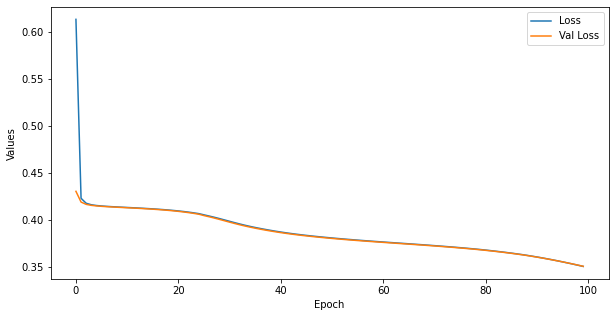

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("Values")
plt.xlabel("Epoch")
plt.legend(["Loss", "Val Loss"], loc="upper right")
plt.show()

In [ ]:
# Calculating the RMSE
user_test = [item[0] for item in X_test]
movies_test = [item[1] for item in X_test]
model_input = [np.asarray(user_test), np.asarray(movies_test)]
y_pred = model.predict(model_input)
y_pred = np.max(y_pred, axis = 1)
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
RMSE

0.34872510099913423

##### 3.2.1.5 Building the recommendation system

In [ ]:
def neural_networks(user_id, model, n_movies):
    # Getting the encoded user
    encoded_user_id = [user_id-1]
    # Getting the encoded numbers of the movies that the user has seen
    seen_movies = list(df[df["userId"] == user_id]["movie"])
    # Getting the unseen movies (opposite of what is above)
    unseen_movies = []
    for value in final["movie"]:
        if value not in seen_movies:
            unseen_movies.append(value)
    # The model will receive a list with the user and its unseen movies
    model_input = [np.asarray(list(encoded_user_id)*len(unseen_movies)), np.asarray(unseen_movies)]
    # The model will then predict, based on these inputs, the ratings of the unseen movies
    # This will output arrays with 9 values (due to the density established above)
    predicted_ratings = model.predict(model_input)
    # Here we are picking the maximum rating of each array from the 9 values
    predicted_ratings = np.max(predicted_ratings, axis = 1)
    # Getting the top 10 ratings
    sorted_predicted_ratings = np.sort(predicted_ratings)[::-1][:n_movies]
    # Multiplying these ratings by 5 since the values from the sigmoid are only between 0 and 1 and we want between 0 and 5
    sorted_predicted_ratings = sorted_predicted_ratings*5
    # Gets the indices that would sort an array to then match with the df["movies"] that we already defined
    sorted_index = (-predicted_ratings).argsort()[:n_movies]
    # Extracts from the indexes, the names of the movies
    recommended_movies = []
    for value in sorted_index:
        recommended_movies.append(final.iloc[value]["title"])
    # Displays the recommended movies on a dataframe with the ratings on the side
    print("\nTop", n_movies, "Movie recommendations for the user", user_id, "are:")
    recommended_movies_df = pd.DataFrame()
    recommended_movies_df["titles"] = recommended_movies[:n_movies]
    recommended_movies_df["ratings"] = sorted_predicted_ratings
    return recommended_movies_df

In [ ]:
user_id = int(input("Enter user id: "))
n_movies = int(input("Enter number of movies to be recommended: "))
neural_networks(user_id, model, n_movies)


Top 10 Movie recommendations for the user 1 are:


titles   ratings
0  White Light/Black Rain: The Destruction of Hir...  4.962554
1                             Flame of Barbary Coast  4.956515
2                                    Bat People, The  4.955157
3                        History of Future Folk, The  4.955091
4                                              Sonny  4.949323
5                                 Hollywood Homicide  4.949141
6                                  An Amazing Couple  4.947060
7                                            Go Fish  4.943918
8             Criminal, The (a.k.a. Concrete Jungle)  4.943359
9                                   Hollywood Ending  4.942055

##### 3.2.1.6 Conclusions

This model was developed using Deep Neural Networks which can easily incorporate query and item features that can help to improve the movie recommendations.

The DNN model looks at past ratings given by users, looks at the ratings the specific user id gave to movies, and predicts the ratings this user would give to movies he or she has not yet seen.

Above is the Top 10 movies that the user 1 should watch next, so the Top 10 movies that the model predicts to have the highest ratings for that specific user.

This model presents a Root Mean Squared Error of around 0.35 which means that the model can relatively predict the data accurately. On the other hand, a strong disadvantage of this model was the computer power that was necessary to train it which didn’t allow for a continuous improvement.


## 4. Conclusions taken from Model Testing

In conclusion, we saw 4 models, 3 of them predict movies based on the last movie that the user has watched and the last one predicts movies based on past ratings.

From the 3 models based on movies, we acknowledge that the one that is best is LightFM, however, our results were not extraordinary. So, from our analysis, we recommend that the suggestion of the Top 10 Movies to Watch next should be based on user’s past ratings using the Deep Neural Networks model that was last proposed.

**This way we can solve our main business problem of “How to improve the user experience on movie streaming applications”.**

We are aware about the implications of implementing this model on multiple businesses in the area. Some examples can be:
- The positive change in consumer behaviour, meaning that the user will speed up the decision process to choose a movie and thus spend more time watching
-
- Increased traffic in the platform
- Increase in the amount of data collect from users, such as user preferences
- And, most importantly, an increase in consumer satisfaction as the user is presented with movies that model knows that he will probably enjoy

However, there are some potential drawbacks of this type of recommendation system model. Some of them being that:
- User preferences are always changing - thus older data might not be useful to predict next movies to watch
- As well as privacy issues since the more the algorithm knows about the customer, the more accurate its recommendations will be. However, many customers are hesitant to hand over personal information.

Therefore, building trust between the business and customers is key.